# Game Recomendations on Steam Platform 

Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

DataFiles

In [41]:
# Read the data from files
path = '/Users/manju/Desktop/Data'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [42]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [43]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [44]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [45]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [46]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [47]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [48]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [49]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [50]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [51]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [52]:
#Focusing only on the games available on macos
counts = df_games['mac'].value_counts()
print(counts)

mac
False    37854
True     13018
Name: count, dtype: int64


In [53]:
df_games_processed = df_games.copy()
df_games_processed = df_games_processed[df_games_processed['mac'] == True]

In [54]:
df_games_processed

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
13,29180,Osmos,2009-08-18,True,True,True,Very Positive,88,532,9.99,9.99,0.0,True
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,True,True,True,Mixed,50,22,10.00,0.00,0.0,True
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,True,True,False,Very Positive,90,62,4.00,0.00,0.0,True
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,True,True,True,Mixed,67,80,5.00,0.00,0.0,True
50851,1555150,Pocket Bravery,2023-08-31,True,True,True,Very Positive,89,248,20.00,0.00,0.0,True


In [55]:
df_games_processed.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio', 'discount', 'price_original'], inplace=True)

In [56]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_processed[['rating']] = enc.fit_transform(df_games_processed[['rating']])

In [57]:
df_games_processed

,app_id,title,date_release,rating,user_reviews,price_final
2,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99
4,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99
6,253980,Enclave,2013-10-04,5.0,1608,4.99
13,29180,Osmos,2009-08-18,7.0,532,9.99
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89
...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00
50851,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00


In [58]:
games_processed = pd.merge(df_games_processed, df_genre[['app_id', 'tags']], on='app_id', how='inner')

In [59]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [60]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,"['Co-op', 'Stealth', 'Indie', 'Heist', 'Local ..."
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,"['Roguelike', 'Strategy', 'Tower Defense', 'Pi..."
2,253980,Enclave,2013-10-04,5.0,1608,4.99,"['RPG', 'Action', 'Fantasy', 'Third Person', '..."
3,29180,Osmos,2009-08-18,7.0,532,9.99,"['Indie', 'Casual', 'Puzzle', 'Relaxing', 'Sin..."
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,"['Action', 'RPG', 'FPS', 'Co-op', 'Shooter', '..."
...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,[]
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,"['Simulation', 'Indie', 'Casual', 'Survival', ..."
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,"['Strategy', 'Indie', 'Simulation']"
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,[]


In [61]:
games_processed['tags'] = games_processed['tags'].str.replace(r"[\[\]\{\}'\"]", "", regex=True)

In [62]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [63]:
games_processed = games_processed.astype({col: 'string' for col in games_processed.select_dtypes(include='object').columns})
#Ensuring tags are lists
games_processed['tags'] = games_processed['tags'].fillna('').str.split(', ')

#Fit-transform into a dense array
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(games_processed['tags'])

#Build one-hot DataFrame with the same index
genre_encoded = pd.DataFrame(
    tag_matrix,
    columns=[f"{t}" for t in mlb.classes_],
    index=games_processed.index    # ← correct usage
)

#Concatenate back
games_processed = pd.concat(
    [games_processed.drop('tags', axis=1), genre_encoded],
    axis=1
)


In [64]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,5.0,1608,4.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,7.0,532,9.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Choose the numeric columns to normalize
numeric_cols = ['rating', 'user_reviews', 'price_final']

# Fit scaler and transform
scaler = MinMaxScaler()
games_processed[numeric_cols] = scaler.fit_transform(games_processed[numeric_cols])


In [66]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,0.875,0.000495,0.055521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,0.875,0.001171,0.044409,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,0.625,0.000213,0.018482,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,0.875,0.000070,0.037001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,0.875,0.000038,0.003296,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000002,0.037038,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000007,0.014815,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000009,0.018519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,0.875,0.000032,0.074077,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
common_game_ids = games_processed['app_id'].unique()   # all game IDs in df2
recommendations = df_recommendations[df_recommendations['app_id'].isin(common_game_ids)]

In [68]:
recommendations.count()

app_id            16314119
helpful           16314119
funny             16314119
date              16314119
is_recommended    16314119
hours             16314119
user_id           16314119
review_id         16314119
dtype: int64

In [69]:
#Droping the review_id column & coverting booolean to numeric
recommendations = df_recommendations.copy()
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

In [70]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,1,36.3,51580
1,304390,4,0,2017-02-17,0,11.5,2586
2,1085660,2,0,2019-11-17,1,336.5,253880
3,703080,0,0,2022-09-23,1,27.4,259432
4,526870,0,0,2021-01-10,1,7.9,23869
...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,1,41.0,1606890
41154790,758870,8,0,2019-07-18,0,8.0,1786254
41154791,696170,3,10,2018-03-26,0,2.0,6370324
41154792,696170,0,0,2018-06-11,1,4.0,1044289


In [71]:
count = (recommendations['hours'] < 2).sum()
count

3796319

In [72]:
recommendations_df = recommendations[recommendations['hours'] > 2].copy()

In [73]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,1,36.3,51580
1,304390,4,0,2017-02-17,0,11.5,2586
2,1085660,2,0,2019-11-17,1,336.5,253880
3,703080,0,0,2022-09-23,1,27.4,259432
4,526870,0,0,2021-01-10,1,7.9,23869
...,...,...,...,...,...,...,...
41154788,391220,0,0,2021-04-28,1,18.0,9958247
41154789,633230,0,0,2021-02-15,1,41.0,1606890
41154790,758870,8,0,2019-07-18,0,8.0,1786254
41154792,696170,0,0,2018-06-11,1,4.0,1044289


In [76]:
#Compute max hours_played per user
user_max_hours = recommendations_df.groupby('user_id')['hours'].max().reset_index()
user_max_hours.rename(columns={'hours': 'max_hours'}, inplace=True)

# Merge with original DataFrame
recommendations_df = recommendations_df.merge(user_max_hours, on='user_id')

#Compute implicit rating
recommendations_df['rating'] = recommendations_df['hours'] / recommendations_df['max_hours']

In [77]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,max_hours_x,rating,max_hours_y,max_hours
0,975370,0,0,2022-12-12,1,36.3,51580,92.6,0.392009,92.6,92.6
1,304390,4,0,2017-02-17,0,11.5,2586,11.5,1.000000,11.5,11.5
2,1085660,2,0,2019-11-17,1,336.5,253880,907.9,0.370636,907.9,907.9
3,703080,0,0,2022-09-23,1,27.4,259432,27.4,1.000000,27.4,27.4
4,526870,0,0,2021-01-10,1,7.9,23869,287.3,0.027497,287.3,287.3
...,...,...,...,...,...,...,...,...,...,...,...
37060471,391220,0,0,2021-04-28,1,18.0,9958247,315.1,0.057125,315.1,315.1
37060472,633230,0,0,2021-02-15,1,41.0,1606890,41.0,1.000000,41.0,41.0
37060473,758870,8,0,2019-07-18,0,8.0,1786254,126.0,0.063492,126.0,126.0
37060474,696170,0,0,2018-06-11,1,4.0,1044289,85.0,0.047059,85.0,85.0


In [79]:
recommendations_df.drop(columns=['max_hours','max_hours_x','max_hours_y'], inplace=True)

In [80]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,975370,0,0,2022-12-12,1,36.3,51580,0.392009
1,304390,4,0,2017-02-17,0,11.5,2586,1.000000
2,1085660,2,0,2019-11-17,1,336.5,253880,0.370636
3,703080,0,0,2022-09-23,1,27.4,259432,1.000000
4,526870,0,0,2021-01-10,1,7.9,23869,0.027497
...,...,...,...,...,...,...,...,...
37060471,391220,0,0,2021-04-28,1,18.0,9958247,0.057125
37060472,633230,0,0,2021-02-15,1,41.0,1606890,1.000000
37060473,758870,8,0,2019-07-18,0,8.0,1786254,0.063492
37060474,696170,0,0,2018-06-11,1,4.0,1044289,0.047059


In [81]:
# Choose the numeric columns to normalize
numeric_cols = ['helpful', 'funny', 'hours']

# Fit scaler and transform
scaler = MinMaxScaler()
recommendations_df[numeric_cols] = scaler.fit_transform(recommendations_df[numeric_cols])

In [82]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,975370,0.000000,0.0,2022-12-12,1,0.034272,51580,0.392009
1,304390,0.000110,0.0,2017-02-17,0,0.009420,2586,1.000000
2,1085660,0.000055,0.0,2019-11-17,1,0.335104,253880,0.370636
3,703080,0.000000,0.0,2022-09-23,1,0.025353,259432,1.000000
4,526870,0.000000,0.0,2021-01-10,1,0.005812,23869,0.027497
...,...,...,...,...,...,...,...,...
37060471,391220,0.000000,0.0,2021-04-28,1,0.015933,9958247,0.057125
37060472,633230,0.000000,0.0,2021-02-15,1,0.038982,1606890,1.000000
37060473,758870,0.000221,0.0,2019-07-18,0,0.005912,1786254,0.063492
37060474,696170,0.000000,0.0,2018-06-11,1,0.001904,1044289,0.047059


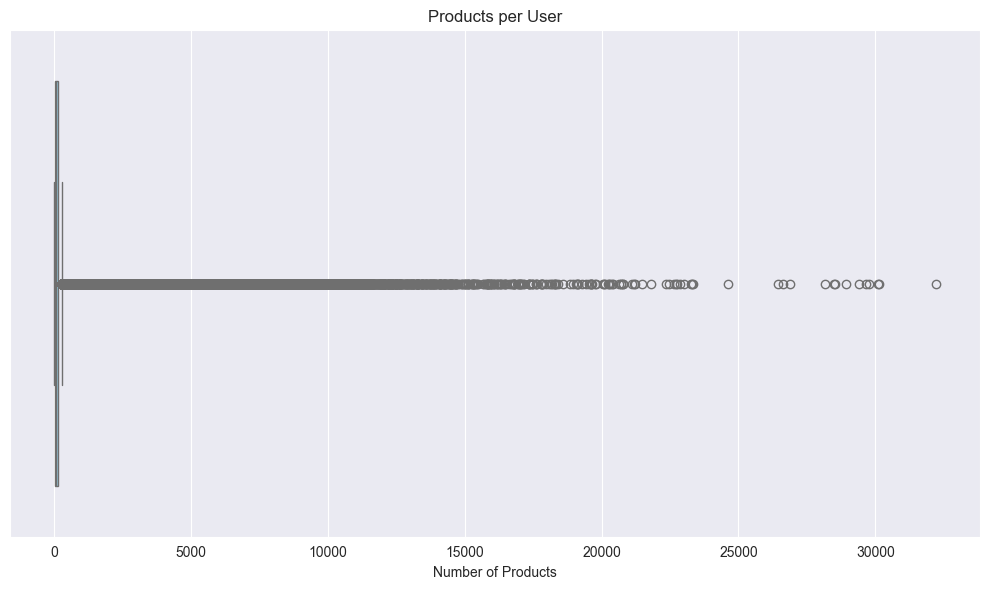

In [83]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

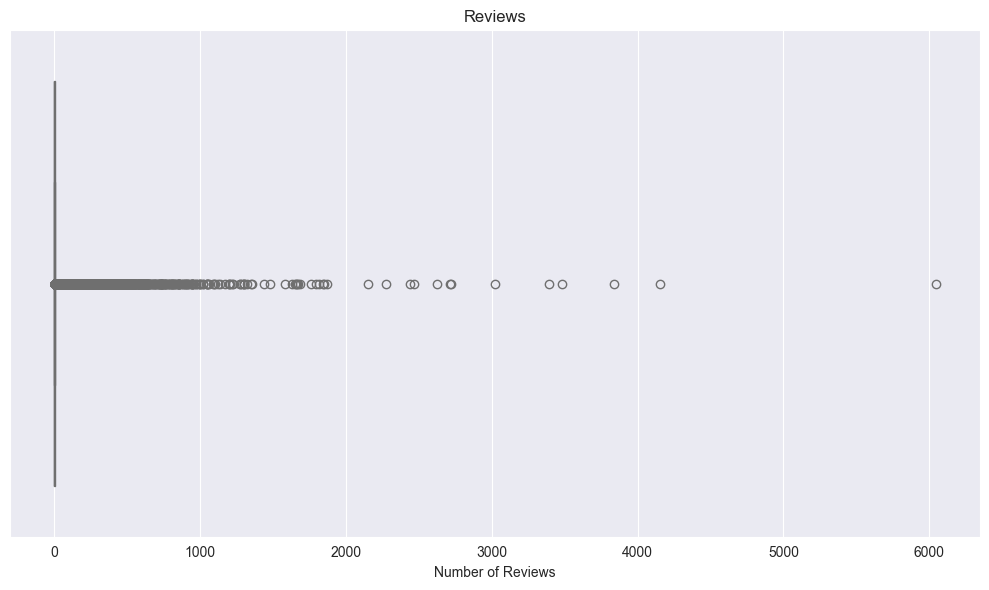

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [85]:
# Choose the numeric columns to normalize
numeric_cols = ['products', 'reviews']

# Fit scaler and transform
scaler = MinMaxScaler()
df_users[numeric_cols] = scaler.fit_transform(df_users[numeric_cols])

In [86]:
df_users

,user_id,products,reviews
0,7360263,0.011144,0.000000
1,14020781,0.004843,0.000165
2,8762579,0.010213,0.000662
3,4820647,0.005463,0.000662
4,5167327,0.003042,0.000331
...,...,...,...
14306059,5047430,0.000186,0.000000
14306060,5048153,0.000000,0.000000
14306061,5059205,0.000962,0.000000
14306062,5074363,0.000000,0.000000
